<a href="https://colab.research.google.com/github/LiLSushiVert/Wine_prediction/blob/main/Wine_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red_s2.csv to winequality-red_s2.csv


In [ ]:
#1
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv(io.BytesIO(uploaded['winequality-red_s2.csv']))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   total sulfur dioxide  1599 non-null   float64
 6   density               1599 non-null   float64
 7   pH                    1599 non-null   float64
 8   sulphates             1599 non-null   float64
 9   alcohol               1599 non-null   float64
 10  quality               1599 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 137.5 KB


In [ ]:
print(df.memory_usage(deep=True))

Index                     132
fixed acidity           12792
volatile acidity        12792
citric acid             12792
residual sugar          12792
chlorides               12792
total sulfur dioxide    12792
density                 12792
pH                      12792
sulphates               12792
alcohol                 12792
quality                 12792
dtype: int64


In [ ]:
df.head(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,21.0,0.9946,3.39,0.47,10.0,7


In [ ]:
print("Number of data samples:", df.shape[0])
print("Number of dimensions:", df.shape[1])

Number of data samples: 1599
Number of dimensions: 11


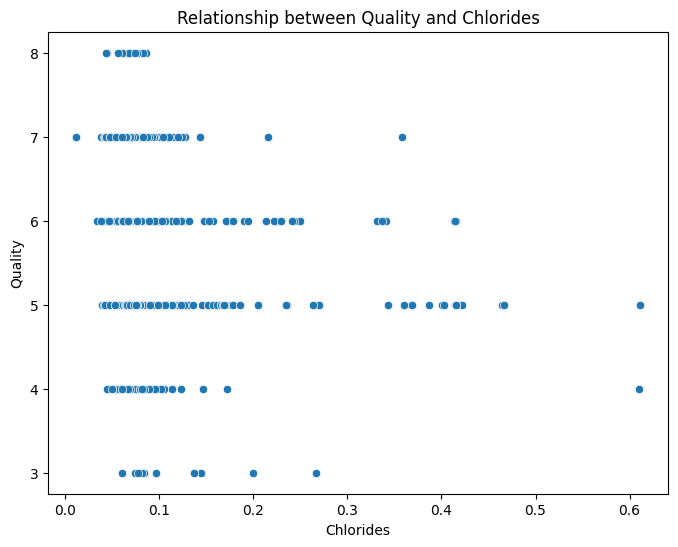

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='chlorides', y='quality', data=df)
plt.title('Relationship between Quality and Chlorides')
plt.xlabel('Chlorides')
plt.ylabel('Quality')
plt.show()

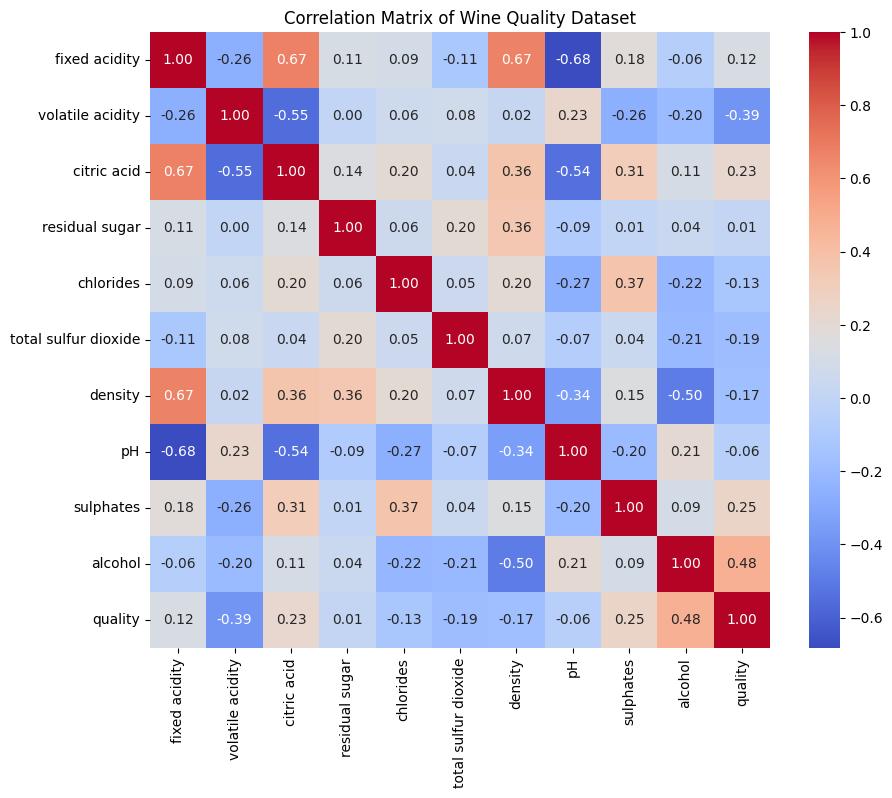

In [ ]:
#2
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Wine Quality Dataset')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
print(scaled_df.head(8))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   
5       0.247788          0.369863         0.00        0.061644   0.105175   
6       0.292035          0.328767         0.06        0.047945   0.095159   
7       0.238938          0.363014         0.00        0.020548   0.088481   

   total sulfur dioxide   density        pH  sulphates   alcohol  quality  
0              0.098940  0.567548  0.606299   0.137725  0.153846      0.4  
1              0.215548  0.494126  0.362205   0.209581  0.215385      0.4  
2              0.169611  0.508811  0.409449   0.191617  0.215385     

In [ ]:
#3
from sklearn.model_selection import train_test_split

X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (959, 10)
X_test shape: (640, 10)
y_train shape: (959,)
y_test shape: (640,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.515625


In [ ]:
results_df = pd.DataFrame({'Actual Value': y_test, 'Prediction Result': y_pred})
print(results_df)

      Actual Value  Prediction Result
803              6                  5
124              5                  5
350              6                  6
682              5                  6
1326             6                  6
...            ...                ...
138              5                  5
549              6                  6
1138             5                  6
962              5                  5
1283             6                  6

[640 rows x 2 columns]


In [ ]:
#4
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.7109375
Mean Absolute Error (MAE): 0.5578125
R-squared (R2): -0.09329418699385394


In [ ]:
from sklearn.metrics import accuracy_score

X_val, X_test_final, y_val, y_test_final = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42
)

y_pred_val = knn.predict(X_val)

accuracy_val = accuracy_score(y_val, y_pred_val)
print("Accuracy on validation data:", accuracy_val)

Accuracy on validation data: 0.5125


In [ ]:
fixed_acidity = 11.2 # @param {type: "number"}
volatile_acidity = 0.28 # @param {type: "number"}
citric_acid = 0.56 # @param {type: "number"}
residual_sugar = 1.9 # @param {type: "number"}
chlorides = 0.075 # @param {type: "number"}
total_sulfur_dioxide = 60 # @param {type: "number"}
density = 0.998 # @param {type: "number"}
pH = 3.16 # @param {type: "number"}
sulphates = 0.58 # @param {type: "number"}
alcohol = 9.8 # @param {type: "number"}
quality = 6 # @param {type: "number"}

In [ ]:
input_data = pd.DataFrame([[fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides,
                            total_sulfur_dioxide, density, pH, sulphates, alcohol]],
                         columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                                   'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])

input_data = input_data[df.drop('quality', axis=1).columns]

input_data_normalized = pd.DataFrame(
    scaler.transform(
        pd.concat([input_data, pd.DataFrame([[0]], columns=['quality'])], axis=1)
    )[:, :-1],
    columns=input_data.columns
)

prediction = knn.predict(input_data_normalized)
print(f"Predicted wine quality (normalized scale): {prediction[0]:.2f}")

print(f"Model accuracy on validation dataset: {accuracy_val:.4f}")

Predicted wine quality (normalized scale): 5.00
Model accuracy on validation dataset: 0.5125
